In [1]:
# Dataset paths
base_dir = '/kaggle/input/house-rooms-image-dataset/House_Room_Dataset'
img_height, img_width = 227, 227  # AlexNet original input size
batch_size = 32

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80-20 split for training and validation
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 4202 images belonging to 5 classes.
Found 1048 images belonging to 5 classes.


In [4]:
def create_alexnet():
    model = models.Sequential([
        # First convolutional layer
        layers.Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=(img_height, img_width, 3)),
        layers.MaxPooling2D(pool_size=(3, 3), strides=2),

        # Second convolutional layer
        layers.Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=2),

        # Third, fourth, and fifth convolutional layers
        layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=2),

        # Flatten and fully connected layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(5, activation='softmax')  # Adjust the number of classes to match your dataset
    ])
    return model

model = create_alexnet()
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,301,829 (222.40 MB)

 Trainable params: 58,301,829 (222.40 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
epochs = 20

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730738473.125414      80 service.cc:145] XLA service 0x7ac6e0004da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730738473.125471      80 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730738473.125475      80 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/132 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.1797 - loss: 1.6092  

I0000 00:00:1730738481.552009      80 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


132/132 ━━━━━━━━━━━━━━━━━━━━ 104s 676ms/step - accuracy: 0.2391 - loss: 1.5872 - val_accuracy: 0.2853 - val_loss: 1.5451
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 74s 538ms/step - accuracy: 0.2867 - loss: 1.5174 - val_accuracy: 0.2824 - val_loss: 1.4984
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 74s 539ms/step - accuracy: 0.3289 - loss: 1.4473 - val_accuracy: 0.3769 - val_loss: 1.3946
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 74s 541ms/step - accuracy: 0.3791 - loss: 1.3700 - val_accuracy: 0.3740 - val_loss: 1.4347
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 74s 537ms/step - accuracy: 0.3745 - loss: 1.3954 - val_accuracy: 0.4055 - val_loss: 1.3404
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 73s 532ms/step - accuracy: 0.3953 - loss: 1.3463 - val_accuracy: 0.3616 - val_loss: 1.4258
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 74s 537ms/step - accuracy: 0.4360 - loss: 1.3096 - val_accuracy: 0.4523 - val_loss: 1.2899
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 74s 535ms/step - accuracy: 0.4576 - loss: 1.2772 - va

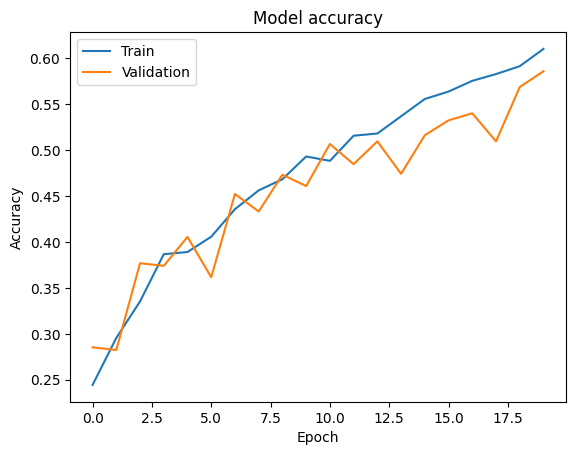

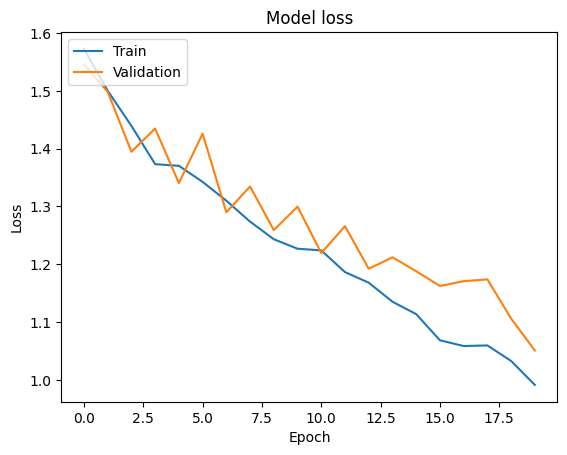

In [7]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [8]:
model.save('alexnet_house_room_classifier.keras')


In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define class names (in the same order as in your training dataset)
class_names = ["Bathroom", "Bedroom", "Dining", "Livingroom", "Kitchen"]

# Function to load and preprocess an image
def preprocess_image(img_path, img_height=227, img_width=227):
    # Load the image with the target size used in training
    img = image.load_img(img_path, target_size=(img_height, img_width))
    # Convert the image to array and normalize it
    img_array = image.img_to_array(img) / 255.0
    # Expand dimensions to make it compatible with the model (batch of size 1)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict the class of a single image
def predict_image_class(model, img_path):
    # Preprocess the image
    img_array = preprocess_image(img_path)
    # Make prediction
    predictions = model.predict(img_array)
    # Get the index of the highest probability class
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class_idx]
    confidence = predictions[0][predicted_class_idx]
    
    # Display the image with the prediction
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted: {predicted_class_name} ({confidence:.2f})")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step


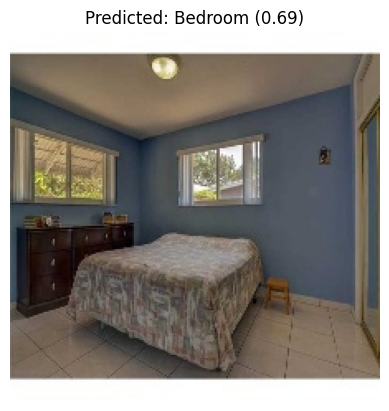

In [10]:

# Load your model
model = tf.keras.models.load_model('/kaggle/working/alexnet_house_room_classifier.keras')

#Predict the class of a new image
predict_image_class(model, '/kaggle/input/house-rooms-image-dataset/House_Room_Dataset/Bedroom/bed_100.jpg')